In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import comb, factorial, exp

In [ ]:
def load_data(file_path):
    try:
        data = pd.read_csv(file_path, header=None).squeeze()
        return data
    except Exception as e:
        print(f"Ошибка при загрузке файла {file_path}: {e}")
        return None

file_paths = ['set_1.csv', 'set_2.csv', 'set_3.csv']
datasets = [load_data(fp) for fp in file_paths]

for i, data in enumerate(datasets):
    if data is not None:
        print(f"Набор данных {i+1} успешно загружен. Количество элементов: {len(data)}")

In [17]:
def calculate_mean(data):
    return np.mean(data)

def calculate_variance(data):
    return np.var(data)

# Расчет параметров для каждого набора данных
for i, data in enumerate(datasets):
    mean = calculate_mean(data)
    variance = calculate_variance(data)
    print(f"Набор данных {i+1}: Математическое ожидание = {mean:.2f}, Дисперсия = {variance:.2f}")

Набор данных 1: Математическое ожидание = 2.85, Дисперсия = 3.63
Набор данных 2: Математическое ожидание = 19.51, Дисперсия = 6846.98
Набор данных 3: Математическое ожидание = 0.11, Дисперсия = 0.01


In [18]:
def remove_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Удаление выбросов
cleaned_datasets = [remove_outliers_iqr(data) for data in datasets]

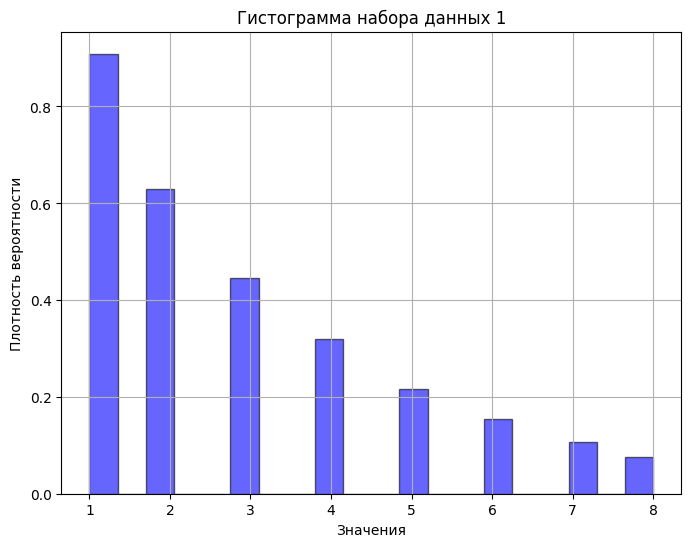

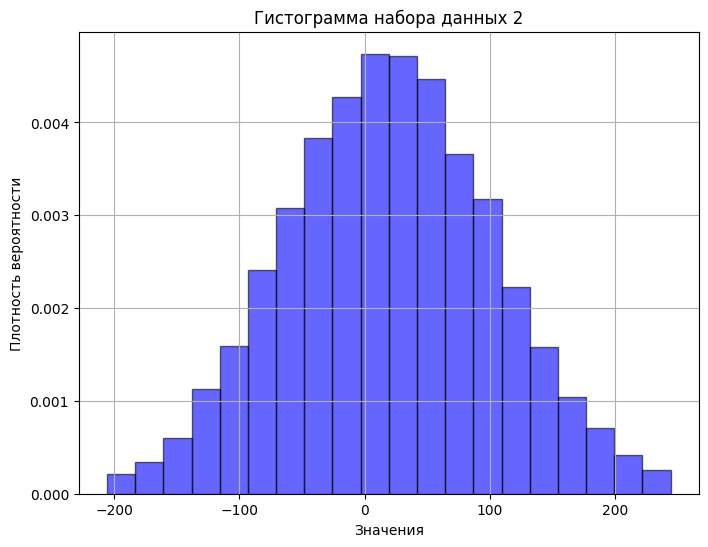

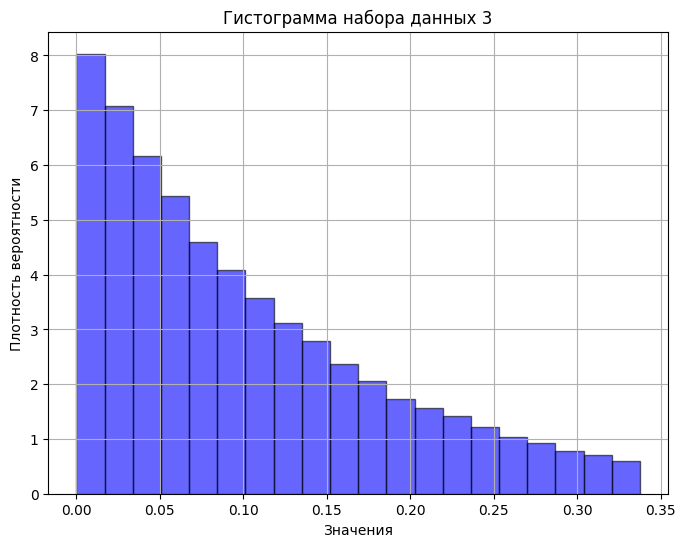

In [19]:
import matplotlib.pyplot as plt

# Построение гистограмм
for i, data in enumerate(cleaned_datasets):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=20, density=True, alpha=0.6, color='b', edgecolor='black')
    plt.title(f'Гистограмма набора данных {i+1}')
    plt.xlabel('Значения')
    plt.ylabel('Плотность вероятности')
    plt.grid(True)
    plt.show()